# Start evalutaion for CPU Indexs fo Question Answering

## Exploratory analisis

In [1]:
import pandas as pd

# Assuming your data is in a CSV file named 'data.csv'
data = pd.read_csv('/home/baptvit/Documents/github/banco-de-dados-massivos/milvus/milvus-python/milvus_python/results/question/evaluation/index_flat__cosine_similarity.csv')

In [2]:
data.head()

,Unnamed: 0,timestamp,index_name,memory_load_duration,query_id,search_duration,top1,top5,top10,distance,query_cost
0,0,2024-06-24 12:41:57.379036,index_flat__cosine_similarity,7.767334,0,0.350191,True,True,True,0.999389,0
1,1,2024-06-24 12:41:57.731492,index_flat__cosine_similarity,7.767334,1,0.378916,True,True,True,0.992952,0
2,2,2024-06-24 12:41:58.113105,index_flat__cosine_similarity,7.767334,2,0.402103,True,True,True,0.992346,0
3,3,2024-06-24 12:41:58.517967,index_flat__cosine_similarity,7.767334,3,0.400600,True,True,True,0.995695,0
4,4,2024-06-24 12:41:58.921079,index_flat__cosine_similarity,7.767334,4,0.393120,True,True,True,0.999460,0


In [3]:
def calculate_accuracy(data):
  accuracy = (data['top1'] == True).mean() * 100  # Calculate percentage
  return accuracy

In [4]:
calculate_accuracy(data)

74.3

In [5]:
# Define time bins (adjust as needed)
time_bins = [0, 0.4, 0.8, 1]

# Calculate average accuracy for each time bin
accuracy_by_time = []
for i in range(len(time_bins) - 1):
  subset = data[(data['search_duration'] >= time_bins[i]) & (data['search_duration'] < time_bins[i+1])]
  accuracy_by_time.append(calculate_accuracy(subset))

# Print results
for i, time_range in enumerate(zip(time_bins[:-1], time_bins[1:])):
  print(f"Average Accuracy for search duration between {time_range[0]} and {time_range[1]} seconds: {accuracy_by_time[i]:.2f}%")


Average Accuracy for search duration between 0 and 0.4 seconds: 74.18%
Average Accuracy for search duration between 0.4 and 0.8 seconds: 75.34%
Average Accuracy for search duration between 0.8 and 1 seconds: 50.00%


# Analise de tempo de retorno: by Index Name

In [6]:
import glob
import os

path = "/home/baptvit/Documents/github/banco-de-dados-massivos/milvus/milvus-python/milvus_python/results/question/evaluation"

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

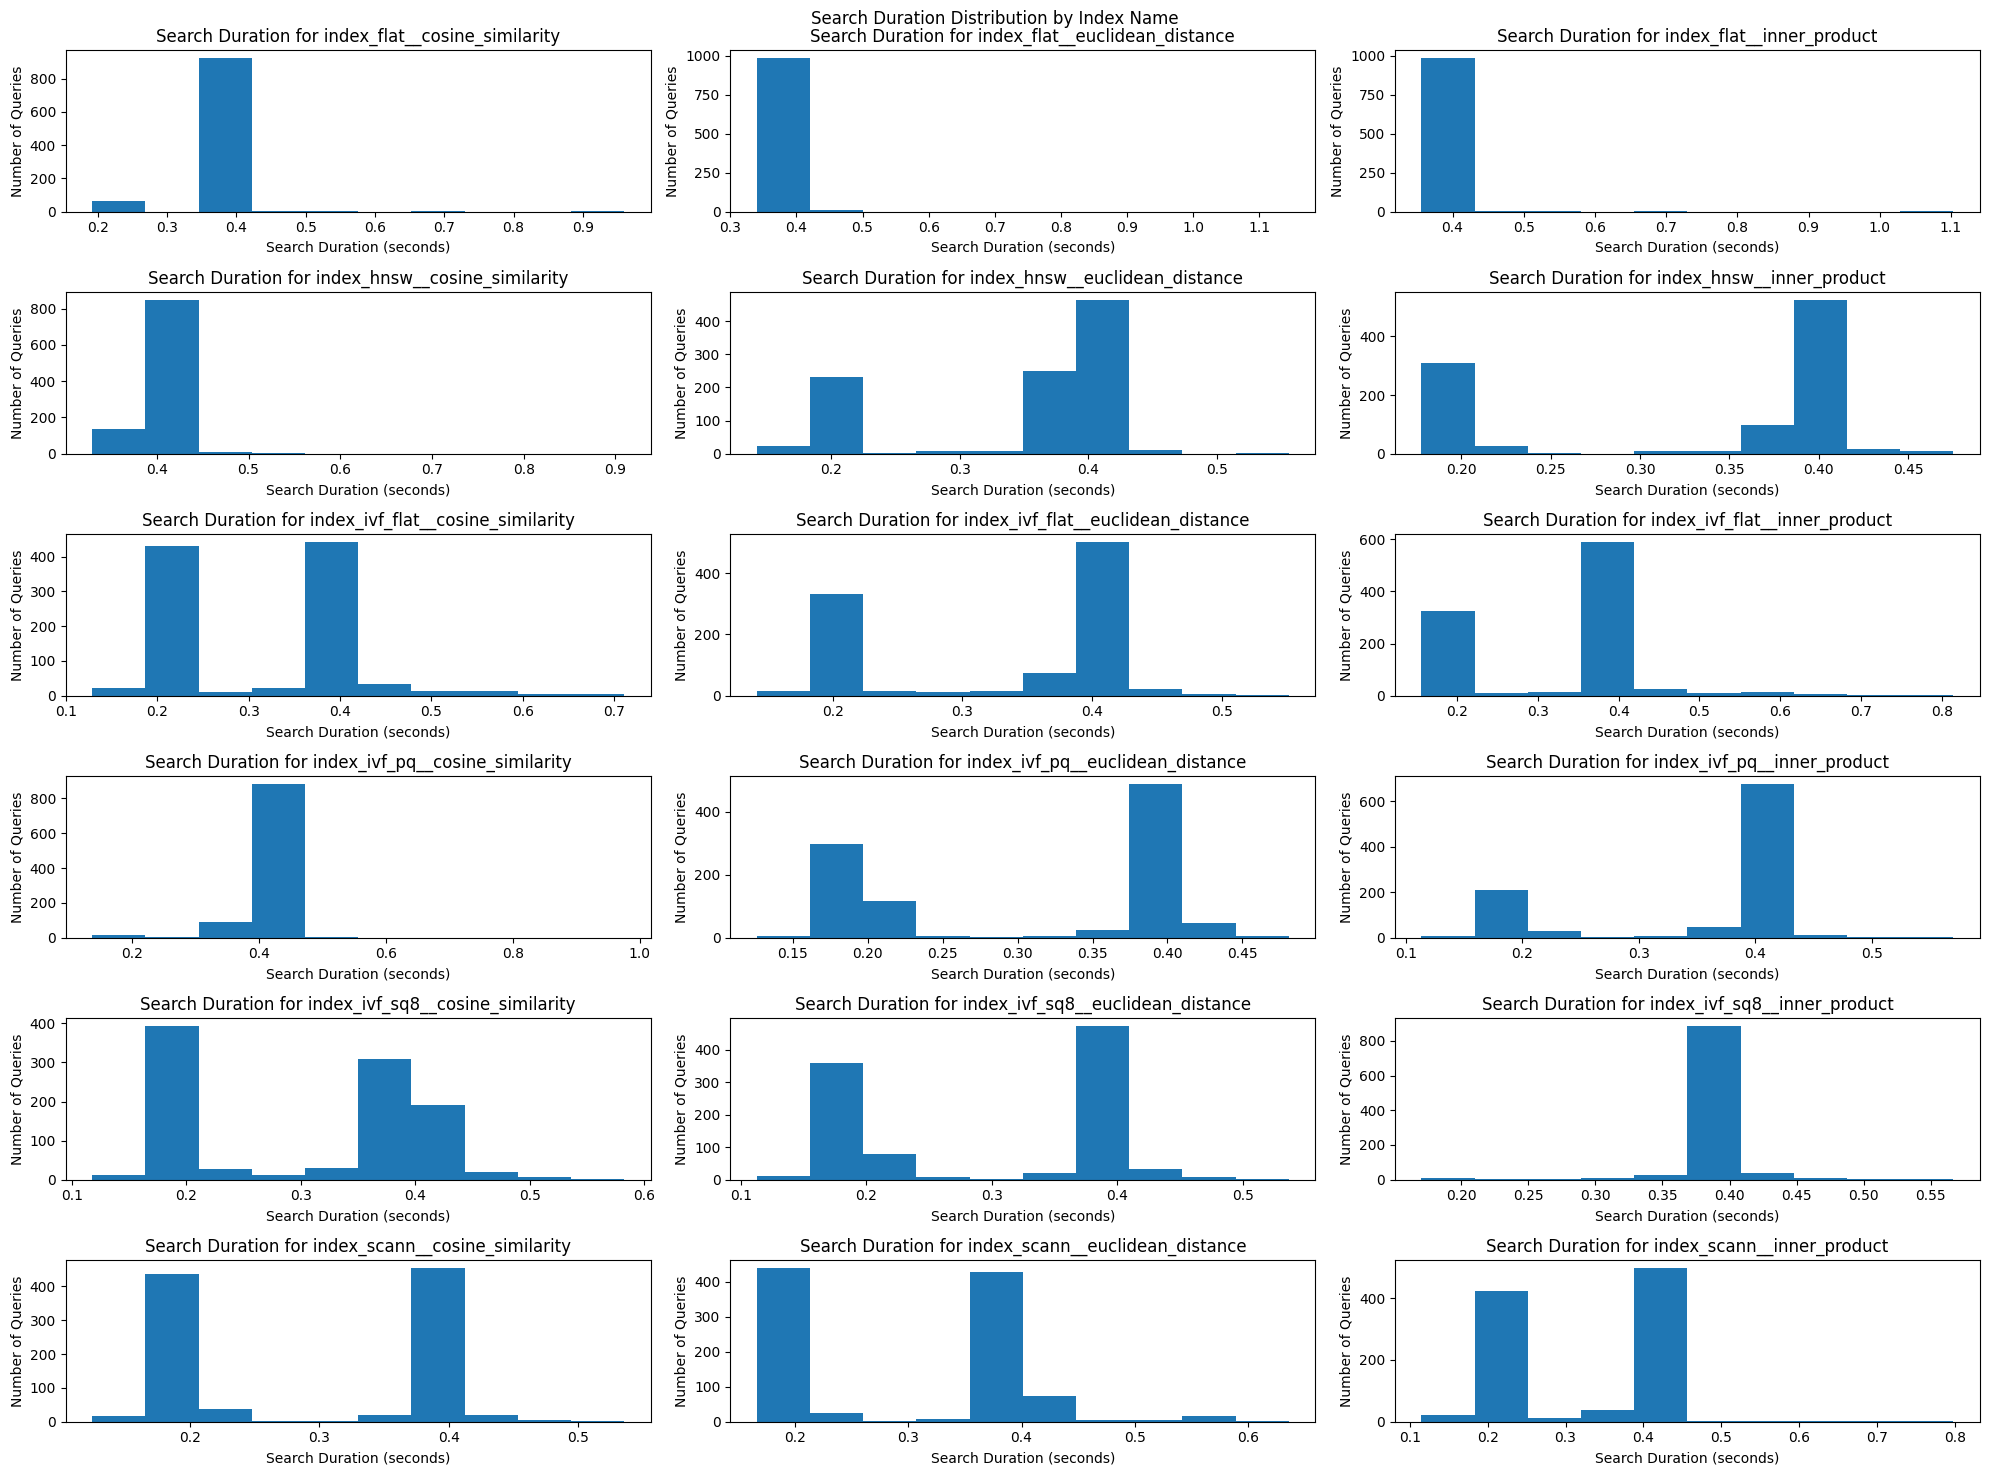

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data into a DataFrame
data = df  # Assuming 'df' is your DataFrame

# Group data by index_name
grouped_data = data.groupby("index_name")

# Configure the number of rows and columns for subplots (adjust as needed)
rows, cols = 6, 3  # Create a 2x2 grid of subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust figsize for better visualization

# Counter to track current subplot position
ax_count = 0

# Analyze search duration and plot for each index
for name, group in grouped_data:
  # Access the current subplot using ax_count
  ax = axes.flat[ax_count]

  # Plot the distribution of search duration
  ax.hist(group["search_duration"])
  ax.set_xlabel("Search Duration (seconds)")
  ax.set_ylabel("Number of Queries")
  ax.set_title(f"Search Duration for {name}")

  # Increase counter for next subplot
  ax_count += 1

# Adjust layout (optional)
fig.suptitle("Search Duration Distribution by Index Name")
plt.tight_layout()

# Show the final plot
plt.show()


In [8]:
import pandas as pd

# Assuming 'df' is your existing DataFrame containing search data
# If not, replace 'df' with the actual CSV reading code

# Group data by index_name
grouped_data = df.groupby("index_name")

# Create an empty DataFrame to store statistics
time_stats_df = pd.DataFrame(columns=["Index Name", "Mean Search Duration", "Median Search Duration", "Standard Deviation", "25th Percentile", "50th Percentile (Median)", "75th Percentile", "90th Percentile"])

# Analyze search duration for each index and populate the DataFrame
for name, group in grouped_data:
  # Calculate statistics
  mean_duration = group['search_duration'].mean()
  median_duration = group['search_duration'].median()
  std_dev = group['search_duration'].std()
  percentiles = group['search_duration'].quantile([0.25, 0.5, 0.75, 0.9])

  # Add a new row to the DataFrame with statistics for this index_name
  time_stats_df = time_stats_df._append({
      "Index Name": name,
      "Mean Search Duration": mean_duration,
      "Median Search Duration": median_duration,
      "Standard Deviation": std_dev,
      "25th Percentile": percentiles[0.25],
      "50th Percentile (Median)": percentiles[0.5],
      "75th Percentile": percentiles[0.75],
      "90th Percentile": percentiles[0.9]
  }, ignore_index=True)

/tmp/ipykernel_256041/1434807934.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  time_stats_df = time_stats_df._append({


## Ordenado pela media

In [9]:
time_stats_df.sort_values(by=['Mean Search Duration']).reset_index(drop = True)

,Index Name,Mean Search Duration,Median Search Duration,Standard Deviation,25th Percentile,50th Percentile (Median),75th Percentile,90th Percentile
0,index_scann__cosine_similarity,0.297148,0.333094,0.101103,0.196407,0.333094,0.396246,0.397982
1,index_ivf_sq8__euclidean_distance,0.304967,0.383373,0.101863,0.196418,0.383373,0.396399,0.398144
2,index_scann__inner_product,0.306968,0.389527,0.102276,0.196592,0.389527,0.396453,0.397248
3,index_scann__euclidean_distance,0.307478,0.378438,0.106482,0.196633,0.378438,0.396589,0.400573
4,index_ivf_sq8__cosine_similarity,0.309242,0.381018,0.101622,0.196633,0.381018,0.396515,0.398475
5,index_ivf_pq__euclidean_distance,0.310780,0.387283,0.100020,0.196567,0.387283,0.396434,0.399114
6,index_ivf_flat__cosine_similarity,0.310973,0.375805,0.111578,0.196623,0.375805,0.396589,0.400015
7,index_ivf_flat__euclidean_distance,0.322587,0.392672,0.097037,0.197378,0.392672,0.396866,0.399009
8,index_hnsw__inner_product,0.327187,0.389068,0.094508,0.200690,0.389068,0.396841,0.403325
9,index_ivf_flat__inner_product,0.338114,0.396011,0.109667,0.197053,0.396011,0.396949,0.399820


## Ordenado pelo Desvio Padrao

In [10]:
time_stats_df.sort_values(by=['Standard Deviation']).reset_index(drop = True)

,Index Name,Mean Search Duration,Median Search Duration,Standard Deviation,25th Percentile,50th Percentile (Median),75th Percentile,90th Percentile
0,index_hnsw__cosine_similarity,0.396852,0.396045,0.024859,0.391305,0.396045,0.398516,0.402211
1,index_ivf_sq8__inner_product,0.392678,0.396541,0.032520,0.395971,0.396541,0.397093,0.398743
2,index_ivf_pq__cosine_similarity,0.393720,0.396636,0.037439,0.395818,0.396636,0.397873,0.401736
3,index_flat__euclidean_distance,0.400009,0.397835,0.038167,0.396625,0.397835,0.399044,0.402013
4,index_flat__inner_product,0.400999,0.397938,0.038428,0.397170,0.397938,0.398749,0.400047
5,index_flat__cosine_similarity,0.387755,0.397568,0.057970,0.396030,0.397568,0.398962,0.400899
6,index_ivf_pq__inner_product,0.346059,0.396073,0.088222,0.254907,0.396073,0.396903,0.397710
7,index_hnsw__euclidean_distance,0.340964,0.389663,0.088664,0.207482,0.389663,0.396818,0.402070
8,index_hnsw__inner_product,0.327187,0.389068,0.094508,0.200690,0.389068,0.396841,0.403325
9,index_ivf_flat__euclidean_distance,0.322587,0.392672,0.097037,0.197378,0.392672,0.396866,0.399009


In [11]:
df.sort_values(by=['Standard Deviation'])

SyntaxError: incomplete input (842867101.py, line 1)

<Axes: title={'center': 'search_duration'}, xlabel='index_name'>

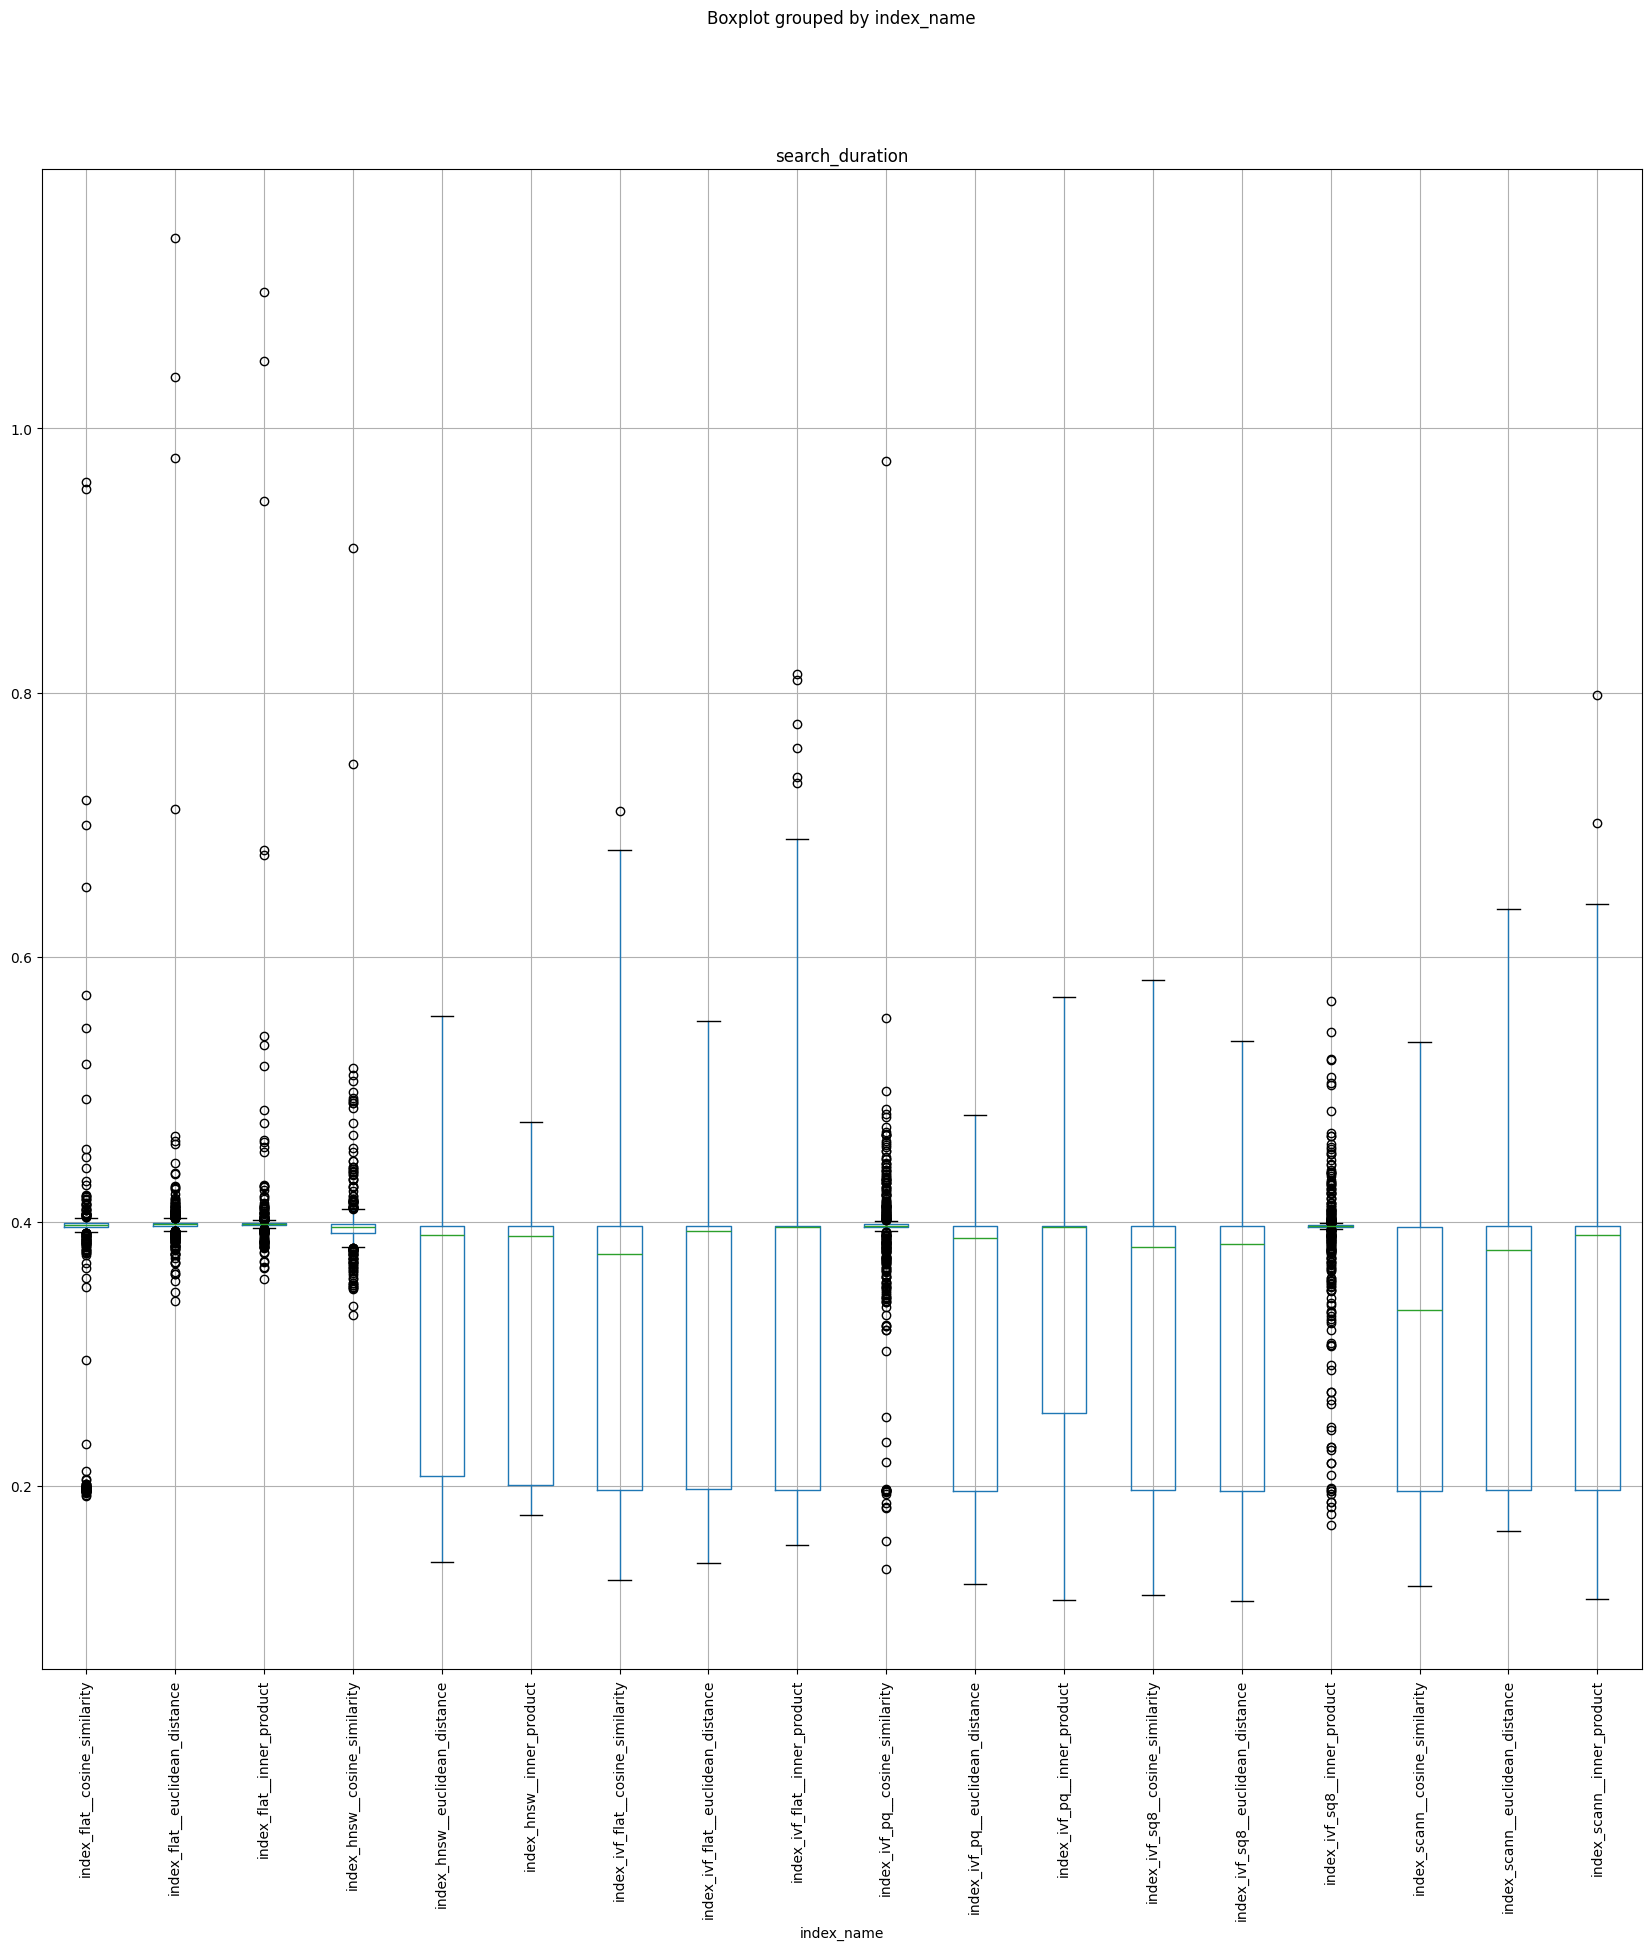

In [12]:
df.boxplot(column=['search_duration'], by='index_name', figsize=(20, 20), rot=90, layout=(1, 1))

## Media  desvio padrao

In [13]:
time_stats_df.sort_values(by=['Mean Search Duration', 'Standard Deviation'])

,Index Name,Mean Search Duration,Median Search Duration,Standard Deviation,25th Percentile,50th Percentile (Median),75th Percentile,90th Percentile
15,index_scann__cosine_similarity,0.297148,0.333094,0.101103,0.196407,0.333094,0.396246,0.397982
13,index_ivf_sq8__euclidean_distance,0.304967,0.383373,0.101863,0.196418,0.383373,0.396399,0.398144
17,index_scann__inner_product,0.306968,0.389527,0.102276,0.196592,0.389527,0.396453,0.397248
16,index_scann__euclidean_distance,0.307478,0.378438,0.106482,0.196633,0.378438,0.396589,0.400573
12,index_ivf_sq8__cosine_similarity,0.309242,0.381018,0.101622,0.196633,0.381018,0.396515,0.398475
10,index_ivf_pq__euclidean_distance,0.310780,0.387283,0.100020,0.196567,0.387283,0.396434,0.399114
6,index_ivf_flat__cosine_similarity,0.310973,0.375805,0.111578,0.196623,0.375805,0.396589,0.400015
7,index_ivf_flat__euclidean_distance,0.322587,0.392672,0.097037,0.197378,0.392672,0.396866,0.399009
5,index_hnsw__inner_product,0.327187,0.389068,0.094508,0.200690,0.389068,0.396841,0.403325
8,index_ivf_flat__inner_product,0.338114,0.396011,0.109667,0.197053,0.396011,0.396949,0.399820


# Analise de accuraria por Index Name

In [14]:
import pandas as pd

# Assuming 'df' is your existing DataFrame containing search data
# If not, replace 'df' with the actual CSV reading code

# Group data by index_name
grouped_data = df.groupby("index_name")

# Create an empty dictionary to store success rates

# Create an empty DataFrame to store statistics
acc_stats_df = pd.DataFrame(columns=["Index Name", "Top 1 Success", "Top 5 Success", "Top 10 Success"])

# Analyze retrieval success rates for each index_name
for name, group in grouped_data:
  # Calculate success rates for Top 1, 5, and 10 retrievals
  top1_success = (group["top1"] == True).sum() / len(group) * 100
  top5_success = (group["top5"] == True).sum() / len(group) * 100
  top10_success = (group["top10"] == True).sum() / len(group) * 100

  # Store success rates in the dictionary
  acc_stats_df = acc_stats_df._append({
      "Index Name": name,
      "Top 1 Success": top1_success,
      "Top 5 Success": top5_success,
      "Top 10 Success": top10_success,
  }, ignore_index=True)

/tmp/ipykernel_256041/2923012851.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  acc_stats_df = acc_stats_df._append({


In [15]:
acc_stats_df.sort_values(by=['Top 1 Success'], ascending=False).reset_index(drop = True)

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success
0,index_ivf_flat__cosine_similarity,74.4,92.0,92.7
1,index_flat__cosine_similarity,74.3,92.1,92.8
2,index_hnsw__cosine_similarity,74.3,92.1,92.8
3,index_hnsw__euclidean_distance,74.3,92.3,93.0
4,index_ivf_flat__euclidean_distance,74.3,92.3,93.0
5,index_ivf_sq8__euclidean_distance,74.3,92.2,93.0
6,index_flat__euclidean_distance,74.3,92.3,93.0
7,index_scann__euclidean_distance,73.8,90.5,90.9
8,index_ivf_sq8__cosine_similarity,72.4,92.3,92.8
9,index_scann__cosine_similarity,72.1,88.0,88.2


In [16]:
acc_stats_df.sort_values(by=['Top 5 Success'], ascending=False).reset_index(drop = True)

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success
0,index_ivf_sq8__cosine_similarity,72.4,92.3,92.8
1,index_hnsw__euclidean_distance,74.3,92.3,93.0
2,index_ivf_flat__euclidean_distance,74.3,92.3,93.0
3,index_flat__euclidean_distance,74.3,92.3,93.0
4,index_ivf_sq8__euclidean_distance,74.3,92.2,93.0
5,index_flat__cosine_similarity,74.3,92.1,92.8
6,index_hnsw__cosine_similarity,74.3,92.1,92.8
7,index_ivf_flat__cosine_similarity,74.4,92.0,92.7
8,index_scann__euclidean_distance,73.8,90.5,90.9
9,index_scann__cosine_similarity,72.1,88.0,88.2


In [17]:
acc_stats_df.sort_values(by=['Top 10 Success'], ascending=False).reset_index(drop = True)

,Index Name,Top 1 Success,Top 5 Success,Top 10 Success
0,index_hnsw__euclidean_distance,74.3,92.3,93.0
1,index_ivf_flat__euclidean_distance,74.3,92.3,93.0
2,index_ivf_sq8__euclidean_distance,74.3,92.2,93.0
3,index_flat__euclidean_distance,74.3,92.3,93.0
4,index_flat__cosine_similarity,74.3,92.1,92.8
5,index_ivf_sq8__cosine_similarity,72.4,92.3,92.8
6,index_hnsw__cosine_similarity,74.3,92.1,92.8
7,index_ivf_flat__cosine_similarity,74.4,92.0,92.7
8,index_scann__euclidean_distance,73.8,90.5,90.9
9,index_scann__cosine_similarity,72.1,88.0,88.2


/tmp/ipykernel_256041/2475269002.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  acc_stats_df = acc_stats_df._append({


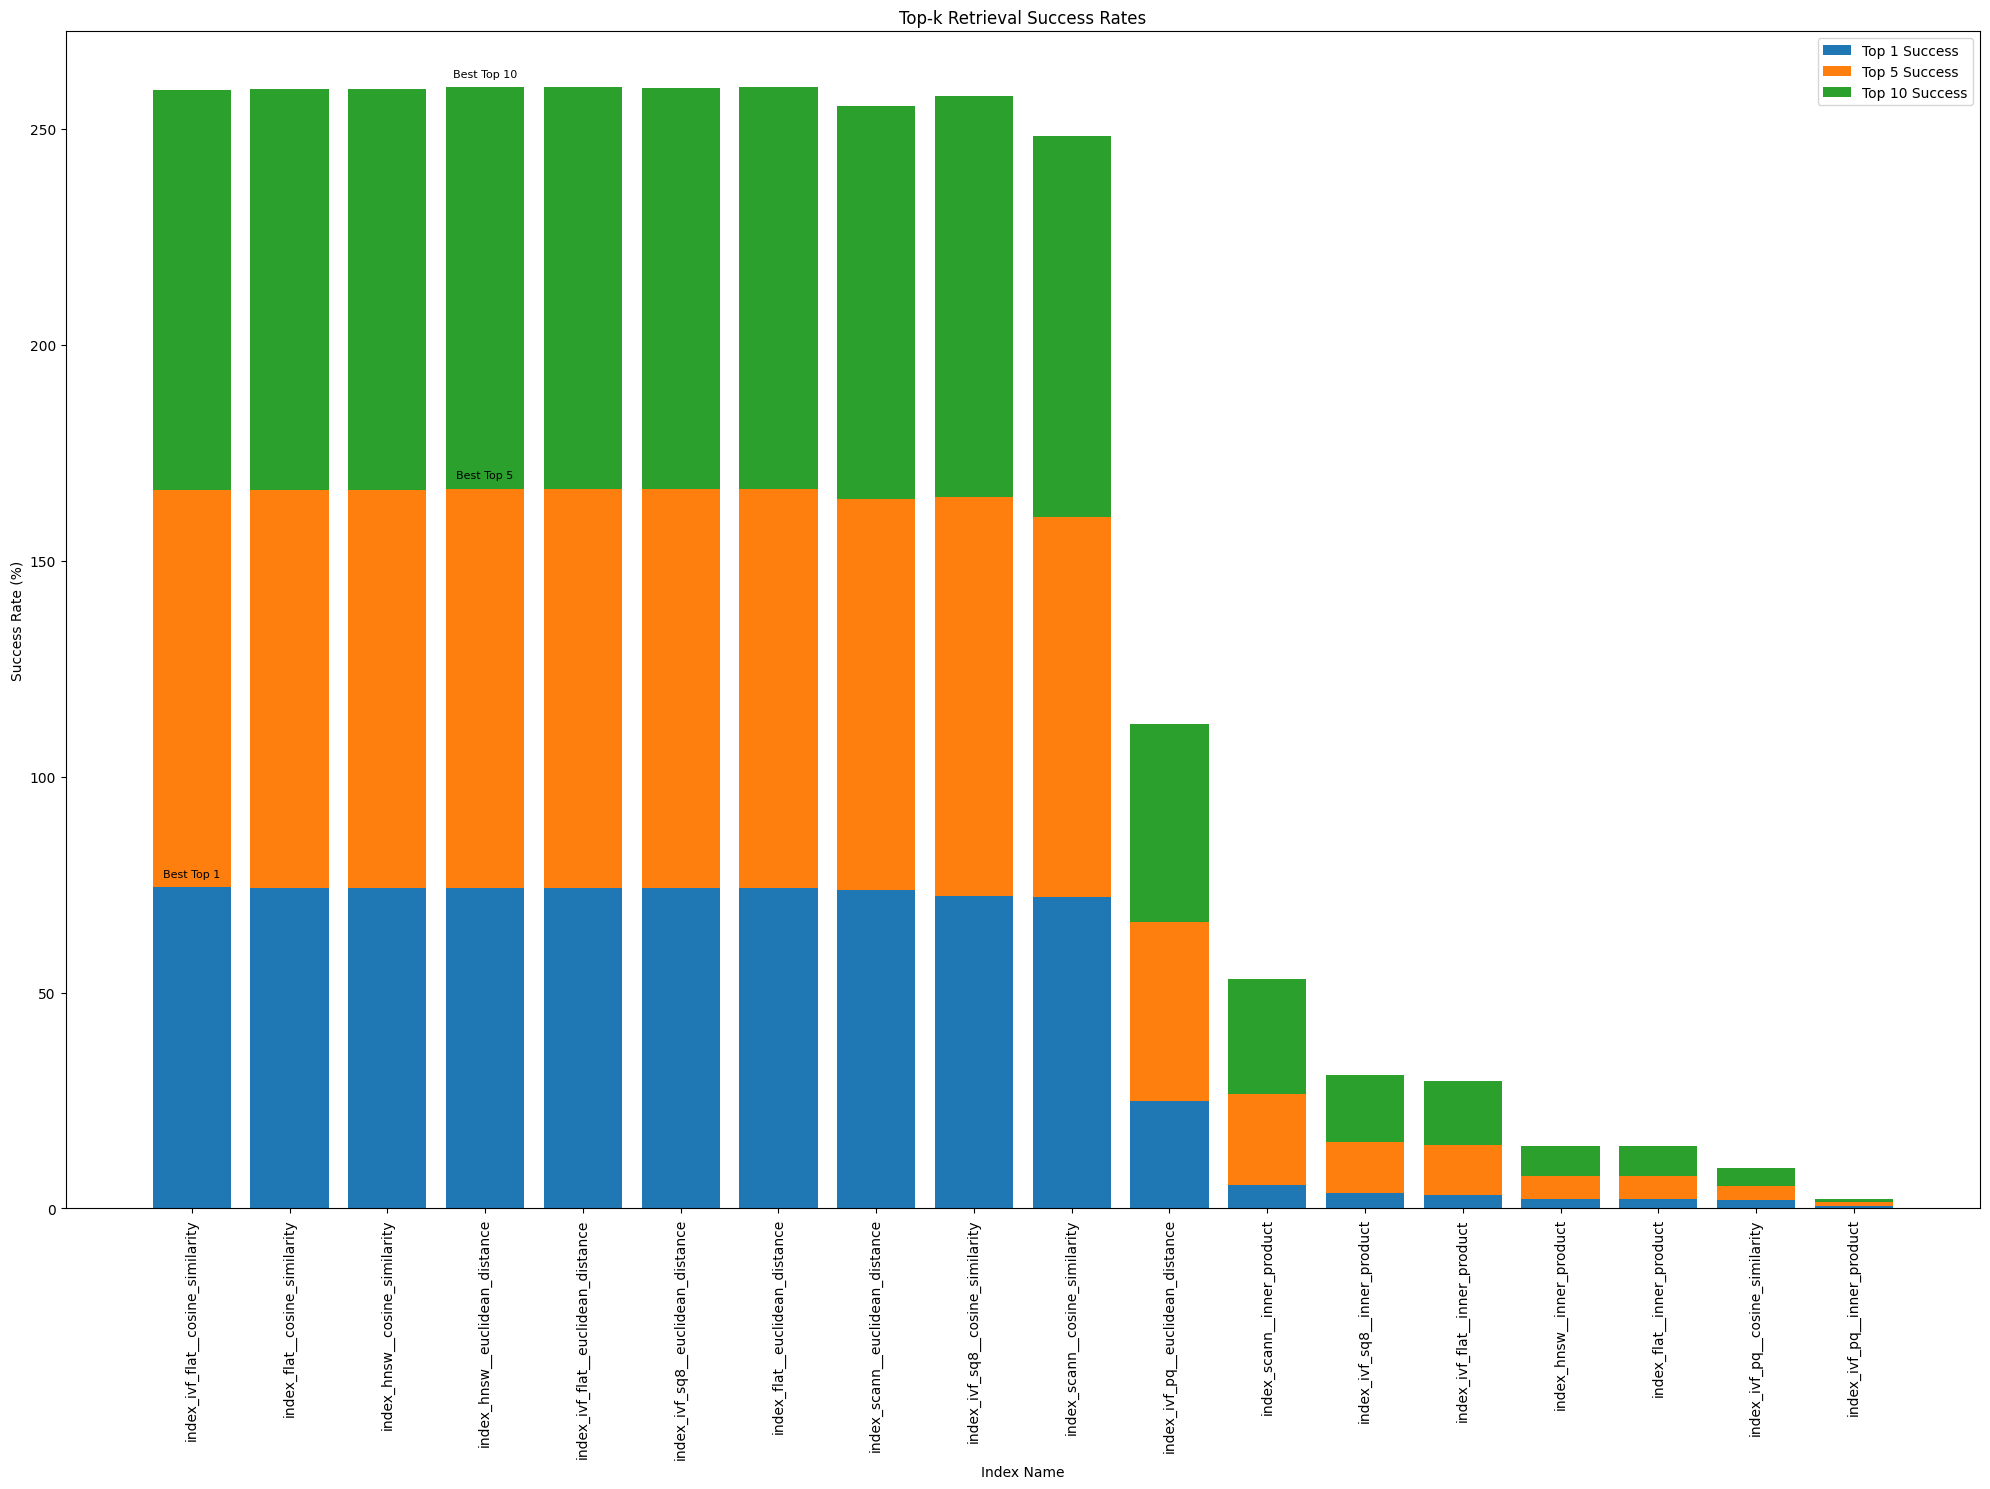

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your existing DataFrame containing search data
# If not, replace 'df' with the actual CSV reading code

# Group data by index_name
grouped_data = df.groupby("index_name")

# Create an empty DataFrame to store success rates
acc_stats_df = pd.DataFrame(columns=["Index Name", "Top 1 Success", "Top 5 Success", "Top 10 Success"])

# Analyze retrieval success rates for each index_name
for name, group in grouped_data:
  # Calculate success rates for Top 1, 5, and 10 retrievals
  top1_success = (group["top1"] == True).sum() / len(group) * 100
  top5_success = (group["top5"] == True).sum() / len(group) * 100
  top10_success = (group["top10"] == True).sum() / len(group) * 100

  # Store success rates in the DataFrame
  acc_stats_df = acc_stats_df._append({
      "Index Name": name,
      "Top 1 Success": top1_success,
      "Top 5 Success": top5_success,
      "Top 10 Success": top10_success
  }, ignore_index=True)

acc_stats_df = acc_stats_df.sort_values(by=['Top 1 Success'], ascending=False).reset_index(drop = True)

# Define a function to identify the best index based on a specific k value (Top 1, 5, or 10)
def get_best_index(k):
  # Sort DataFrame by the chosen success rate column in descending order
  sorted_df = acc_stats_df.sort_values(by=f"Top {k} Success", ascending=False)
  # Return the index_name with the highest success rate
  return sorted_df.iloc[0]["Index Name"]

# Find the best index names for Top 1, 5, and 10
best_top1_index = get_best_index(1)
best_top5_index = get_best_index(5)
best_top10_index = get_best_index(10)

# Create a bar chart to visualize success rates
fig, ax = plt.subplots(figsize=(20, 15))
x = acc_stats_df["Index Name"]
y1 = acc_stats_df["Top 1 Success"]
y2 = acc_stats_df["Top 5 Success"]
y3 = acc_stats_df["Top 10 Success"]

# Plot bars for each success rate metric
ax.bar(x, y1, label='Top 1 Success')
ax.bar(x, y2, label='Top 5 Success', bottom=y1)
ax.bar(x, y3, label='Top 10 Success', bottom=[y1[i] + y2[i] for i in range(len(y1))])

# Set labels and title
ax.set_xlabel("Index Name")
ax.set_ylabel("Success Rate (%)")
ax.set_title("Top-k Retrieval Success Rates")

# Add legend and rotate x-axis labels for better readability
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Annotate the best performing indexes for Top 1, 5, and 10
for i, row in acc_stats_df.iterrows():
  index_name = row["Index Name"]
  if index_name == best_top1_index:
    plt.text(i, y1[i] + 2, "Best Top 1", ha='center', va='bottom', fontsize=8)
  if index_name == best_top5_index:
    plt.text(i, y1[i] + y2[i] + 2, "Best Top 5", ha='center', va='bottom', fontsize=8)
  if index_name == best_top10_index:
    plt.text(i, y1[i] + y2[i] + y3[i] + 2, "Best Top 10", ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


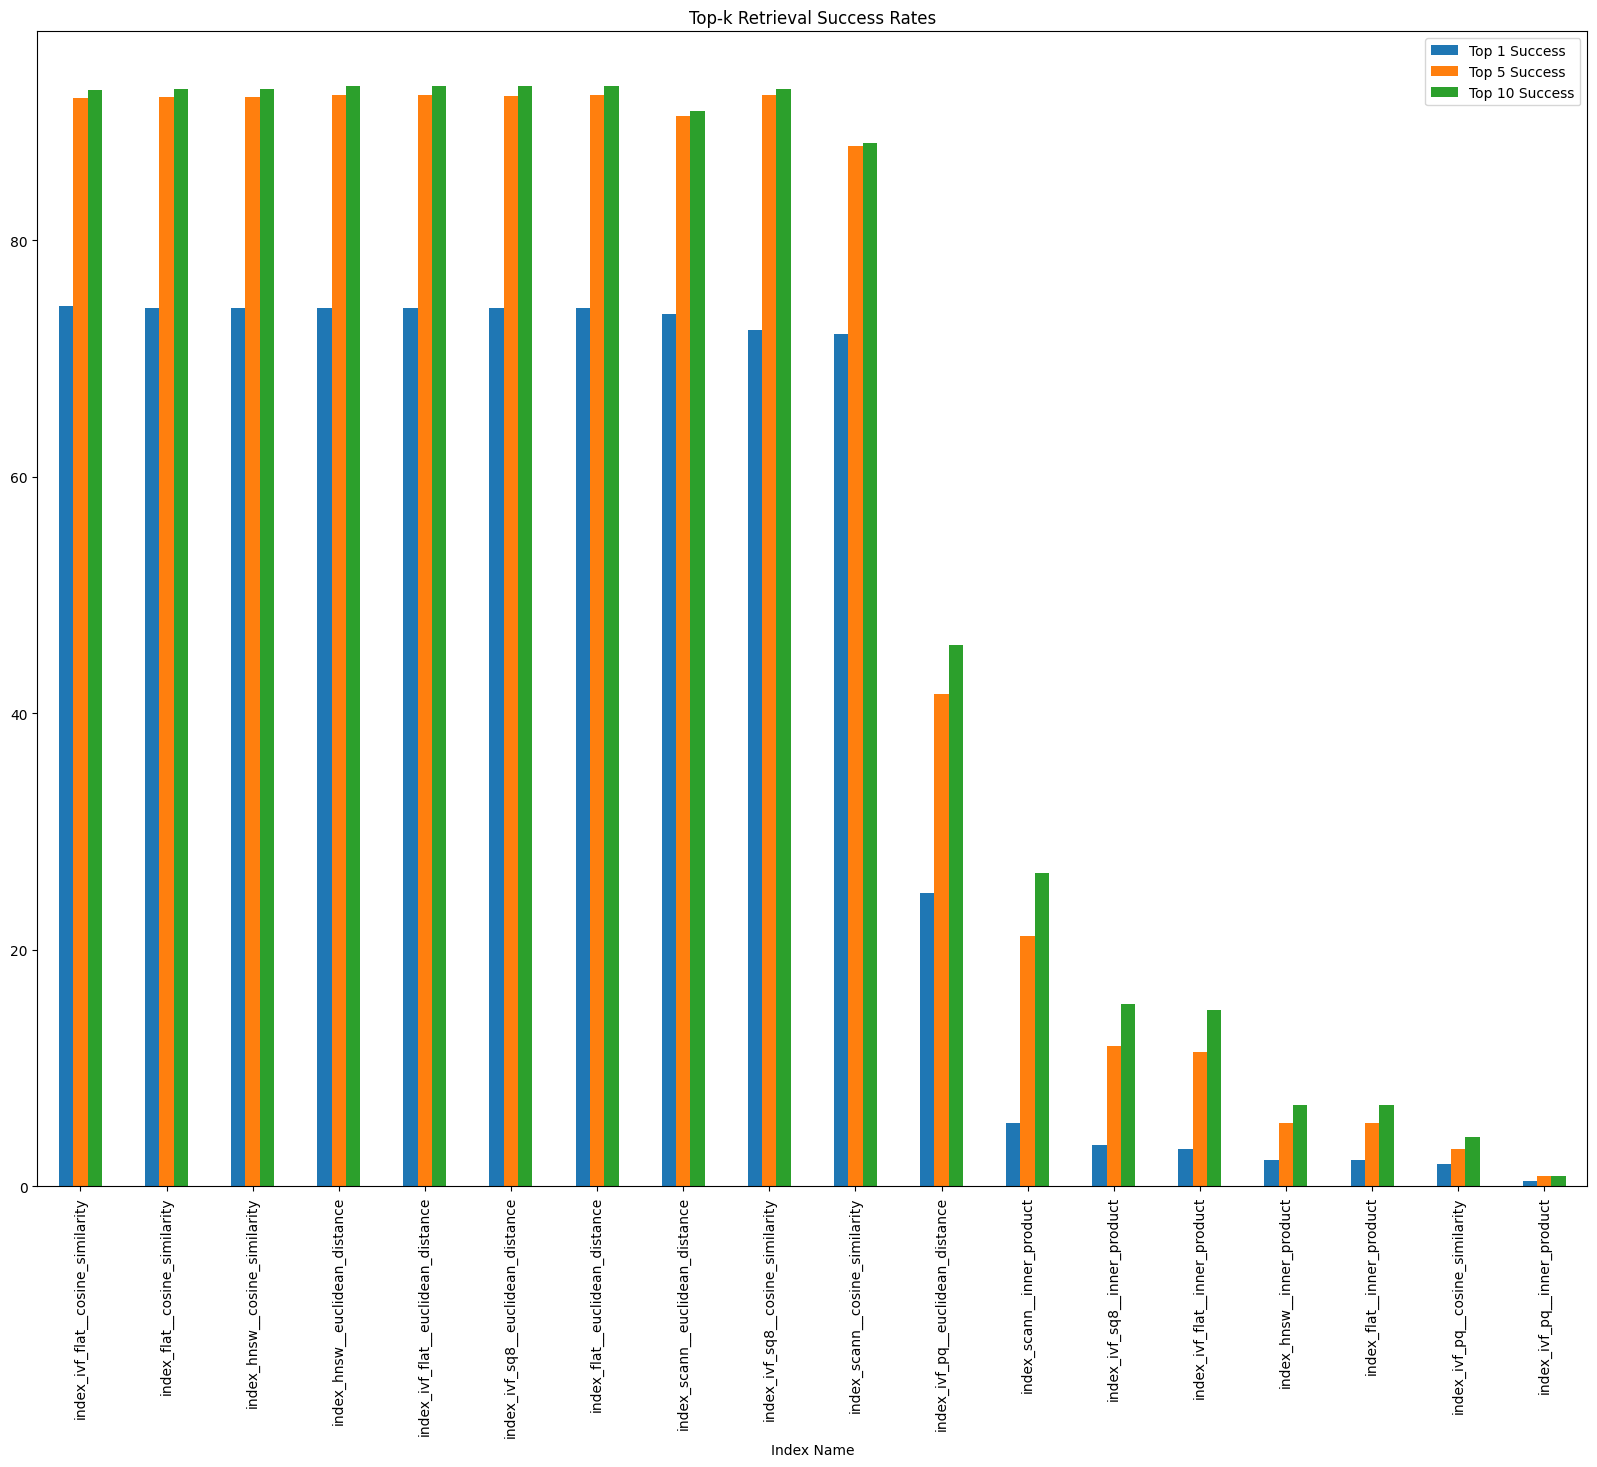

In [19]:
ax = acc_stats_df.plot.bar(x="Index Name", rot=90, figsize=(20, 15), title="Top-k Retrieval Success Rates")

# Accuray vs Tempo

In [ ]:
path = "/home/baptvit/Documents/github/banco-de-dados-massivos/milvus/milvus-python/milvus_python/results/question/setup"

all_files = glob.glob(os.path.join(path, "*.csv"))

setup = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [ ]:
setup

In [ ]:
result = acc_stats_df.set_index('Index Name').join(time_stats_df.set_index('Index Name')).join(setup.set_index('index_name'))

In [ ]:
result

In [ ]:
result.to_csv("question_stats.csv")

In [ ]:
time_analises_1 = result[['Top 1 Success', 'Mean Search Duration']].reset_index()


In [ ]:
# Extract mean search duration and top 1 success
import numpy as np 

colormap = plt.cm.tab20
colors = colormap(np.linspace(0, 1, 18))

df = time_analises_1
mean_duration = df["Mean Search Duration"]
top1_accuracy = df["Top 1 Success"]

# Create the scatter plot
plt.figure(figsize=(12, 8))
for i, row in df.iterrows():
    plt.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])

# Add labels and title
plt.xlabel("Mean Search Duration (seconds)")
plt.ylabel("Top 1 Success (%)")
plt.title("Top-1 Accuracy vs. Mean Search Time (colored by Index Name)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=5)
plt.grid(True)
plt.show()

## Analise accuraria top 1, 5 e 10 pela media de tempo

In [ ]:
time_analises = result[['Top 1 Success', 'Top 5 Success', 'Top 10 Success', 'Mean Search Duration']].reset_index()
time_analises

In [ ]:
# Extract mean search duration and top 1 success
import numpy as np 

colormap = plt.cm.tab20
colors = colormap(np.linspace(0, 1, 18))

df = time_analises.sort_values(by=['Mean Search Duration'], ascending=True).reset_index(drop = True)

rows, cols = 1, 3  # Create a 2x2 grid of subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(30, 8))  # Adjust figsize for better visualization

# Counter to track current subplot position
ax_count = 0

list_graphs = ['Top 1 Success', 'Top 5 Success', 'Top 10 Success']
for name in list_graphs:
    ax = axes.flat[ax_count]

    mean_duration = df["Mean Search Duration"]
    top1_accuracy = df[name]
    
    # Create the scatter plot
    #ax.figure(figsize=(8, 8))
    for i, row in df.iterrows():
        ax.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])
    
    # Add labels and title
    ax.set_xlabel("Mean Search Duration (seconds)")
    ax.set_ylabel(f"{name} (%)")
    ax.set_title(f"{name} Accuracy vs. Mean Search Time (colored by Index Name)")
    ax.grid(True)
    ax_count += 1


# Adjust layout (optional)
plt.suptitle("Search Duration Distribution by Top 1, 5 and 10 Success")
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.07),
              fancybox=True, shadow=True, ncol=8)
    

# Show the final plot
plt.show()

## Analise do top 1, 5 e 10 pelo desvio padrao - Estabilidade da accuraria

In [ ]:
time_analises_dsv = result[['Top 1 Success', 'Top 5 Success', 'Top 10 Success', 'Standard Deviation']].reset_index()
time_analises_dsv

In [ ]:
# Extract mean search duration and top 1 success
import numpy as np 

colormap = plt.cm.tab20
colors = colormap(np.linspace(0, 1, 18))

df = time_analises_dsv.sort_values(by=['Top 1 Success'], ascending=False).reset_index(drop = True)

rows, cols = 1, 3  # Create a 2x2 grid of subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(30, 8))  # Adjust figsize for better visualization

# Counter to track current subplot position
ax_count = 0

list_graphs = ['Top 1 Success', 'Top 5 Success', 'Top 10 Success']
for name in list_graphs:
    ax = axes.flat[ax_count]

    mean_duration = df["Standard Deviation"]
    top1_accuracy = df[name]
    
    # Create the scatter plot
    #ax.figure(figsize=(8, 8))
    for i, row in df.iterrows():
        ax.scatter(mean_duration[i], top1_accuracy[i], s=150, c=colors[i], label=row["Index Name"])
    
    # Add labels and title
    ax.set_xlabel("Standard Deviation (seconds)")
    ax.set_ylabel(f"{name} (%)")
    ax.set_title(f"{name} Accuracy vs. Standard Deviation (colored by Index Name)")
    ax.grid(True)
    ax_count += 1


# Adjust layout (optional)
plt.suptitle("Standard Deviation Distribution by Top 1, 5 and 10 Success")
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.07),
              fancybox=True, shadow=True, ncol=8)
    

# Show the final plot
plt.show()

## Analise accuraria top 1, 5 e 10 pela media de tempo x Tempo de build do indicie

In [ ]:
result_index = result[['Top 1 Success', 'Top 5 Success', 'Top 10 Success', 
        'Mean Search Duration', 'build_index_duration_s']].reset_index()
column = "build_index_duration_s" 
#result_index["norm_build_index_duration_s"] = (result_index[column] - result_index[column].mean()) / result_index[column].std()  
result_index

In [ ]:
# Extract mean search duration and top 1 success
import numpy as np 

colormap = plt.cm.tab20
colors = colormap(np.linspace(0, 1, 18))

df = result_index.sort_values(by=['Mean Search Duration'], ascending=True).reset_index(drop = True)

rows, cols = 1, 3  # Create a 2x2 grid of subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(30, 8))  # Adjust figsize for better visualization

# Counter to track current subplot position
ax_count = 0

list_graphs = ['Top 1 Success', 'Top 5 Success', 'Top 10 Success']
for name in list_graphs:
    ax = axes.flat[ax_count]

    mean_duration = df["Mean Search Duration"]
    top1_accuracy = df[name]
    
    # Create the scatter plot
    #ax.figure(figsize=(8, 8))
    for i, row in df.iterrows():
        ax.scatter(mean_duration[i], top1_accuracy[i], s=row["build_index_duration_s"] + 50, c=colors[i], label=row["Index Name"])
    
    # Add labels and title
    ax.set_xlabel("Mean Search Duration (seconds)")
    ax.set_ylabel(f"{name} (%)")
    ax.set_title(f"{name} Accuracy vs. Mean Search Time (colored by Index Name)")
    ax.grid(True)
    ax_count += 1


# Adjust layout (optional)
plt.suptitle("Mean Search Duration  by Top 1, 5 and 10 Accuracy sized by Index Build Time in S")
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.07),
              fancybox=True, shadow=True, ncol=8, draggable=True)
    

# Show the final plot
plt.show()